# Predict diabetes based on diagnostic measures using Machine Learning

## Group 09

In [2]:
#import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#model evaluators
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, roc_curve, auc

In [4]:
#models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [5]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [6]:
df = pd.read_csv("diabetes.csv")

In [7]:
df.shape

(768, 9)

In [8]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:

df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [10]:
df.describe().round().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,4.0,3.0,0.0,1.0,3.0,6.0,17.0
Glucose,768.0,121.0,32.0,0.0,99.0,117.0,140.0,199.0
BloodPressure,768.0,69.0,19.0,0.0,62.0,72.0,80.0,122.0
SkinThickness,768.0,21.0,16.0,0.0,0.0,23.0,32.0,99.0
Insulin,768.0,80.0,115.0,0.0,0.0,30.0,127.0,846.0
BMI,768.0,32.0,8.0,0.0,27.0,32.0,37.0,67.0
DiabetesPedigreeFunction,768.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
Age,768.0,33.0,12.0,21.0,24.0,29.0,41.0,81.0
Outcome,768.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [11]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Data visualization

C:\Users\gihan\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Pregnancies Distribution'}, xlabel='Pregnancies', ylabel='Count'>

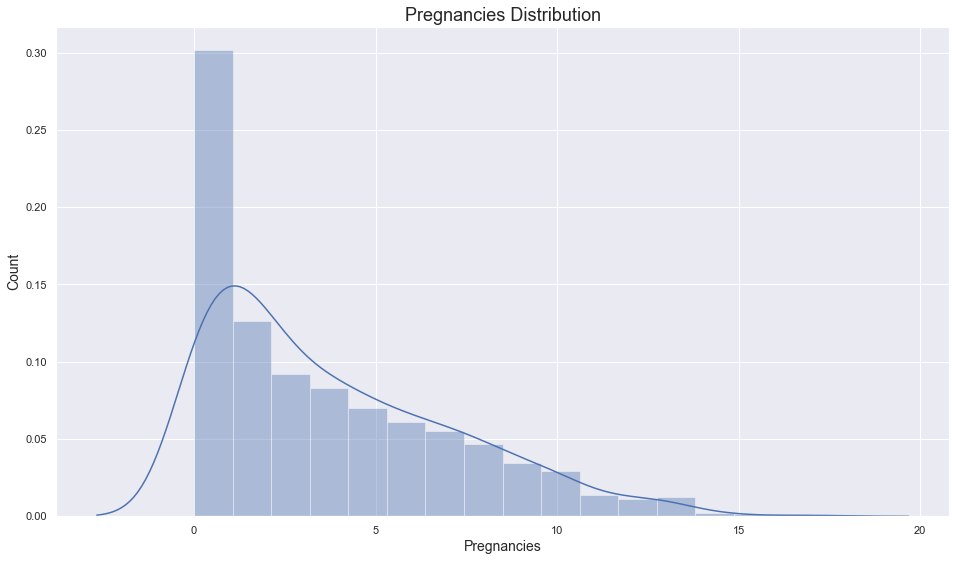

In [12]:
sns.set(rc={'figure.figsize':(16,9)})      # FIGURE SIZE, 16:9

plt.title('Pregnancies Distribution', fontsize=18)
plt.xlabel('Pregnancies', fontsize=14)
plt.ylabel('Count', fontsize=14)
sns.distplot(df['Pregnancies'].dropna())

C:\Users\gihan\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Glucose Distribution'}, xlabel='Glucose', ylabel='Count'>

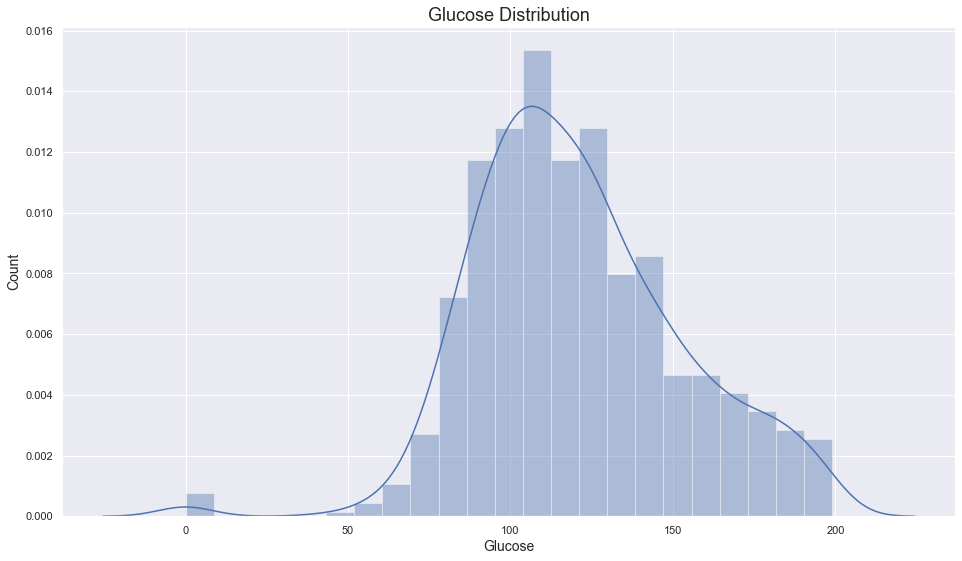

In [13]:
plt.title('Glucose Distribution', fontsize=18)
plt.xlabel('Glucose', fontsize=14)
plt.ylabel('Count', fontsize=14)
sns.distplot(df['Glucose'].dropna())

C:\Users\gihan\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Blood Pressure Distribution'}, xlabel='BloodPressure', ylabel='Count'>

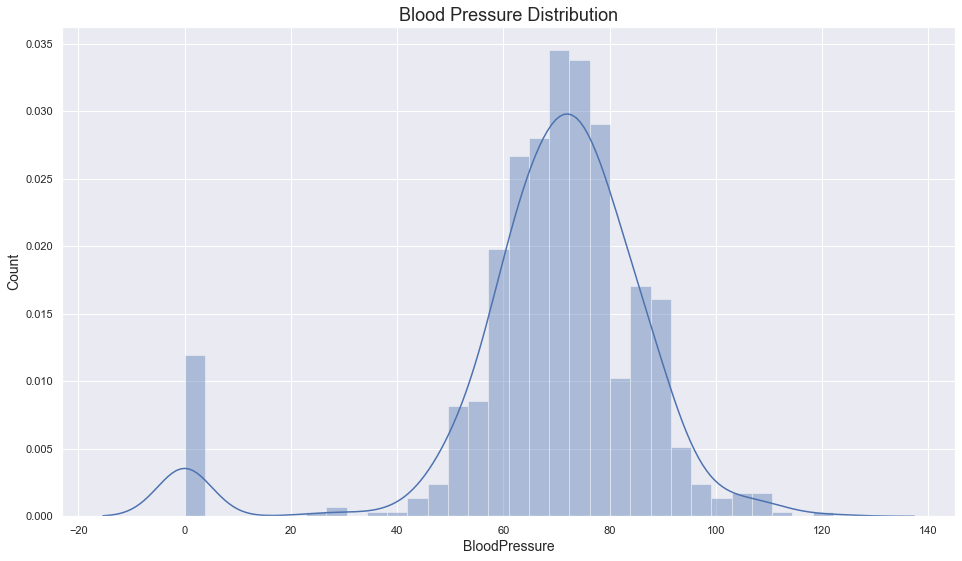

In [14]:
plt.title('Blood Pressure Distribution', fontsize=18)
plt.xlabel('Blood Pressure', fontsize=14)
plt.ylabel('Count', fontsize=14)
sns.distplot(df['BloodPressure'].dropna())

C:\Users\gihan\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Skin Thickness Distribution'}, xlabel='SkinThickness', ylabel='Count'>

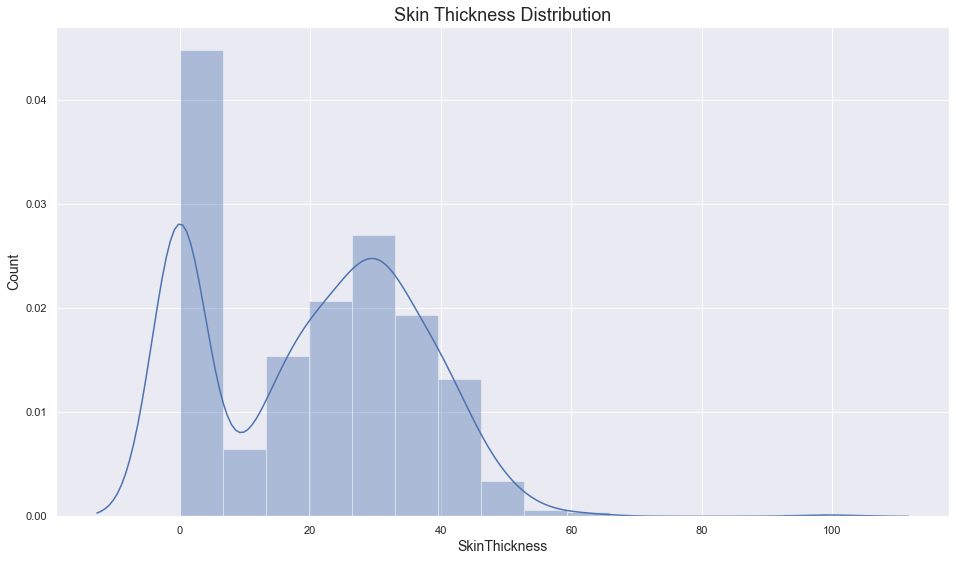

In [15]:
plt.title('Skin Thickness Distribution', fontsize=18)
plt.xlabel('Skin Thickness', fontsize=14)
plt.ylabel('Count', fontsize=14)
sns.distplot(df['SkinThickness'].dropna())

C:\Users\gihan\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Insulin Distribution'}, xlabel='Insulin', ylabel='Count'>

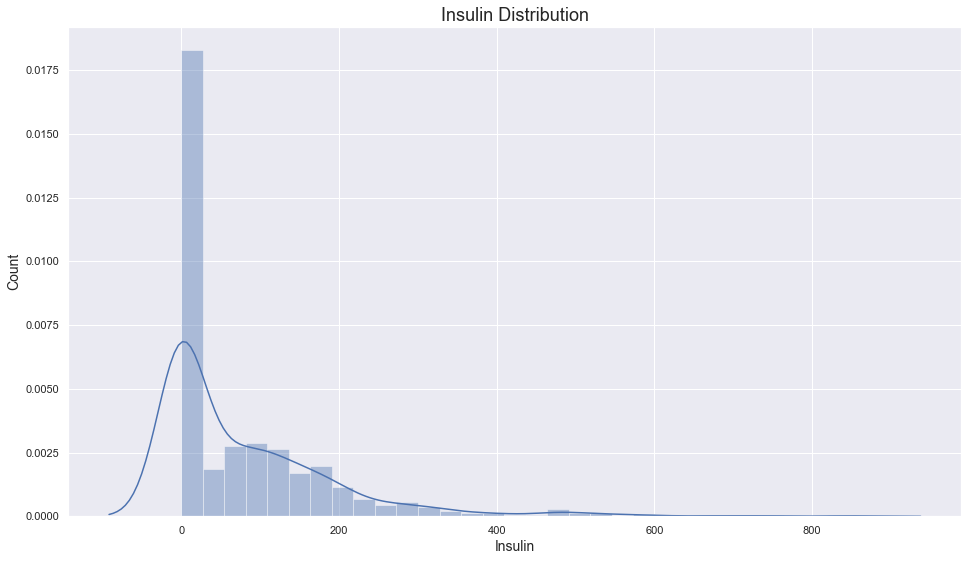

In [16]:
plt.title('Insulin Distribution', fontsize=18)
plt.xlabel('Insulin', fontsize=14)
plt.ylabel('Count', fontsize=14)
sns.distplot(df['Insulin'].dropna())

C:\Users\gihan\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'BMI Distribution'}, xlabel='BMI', ylabel='Count'>

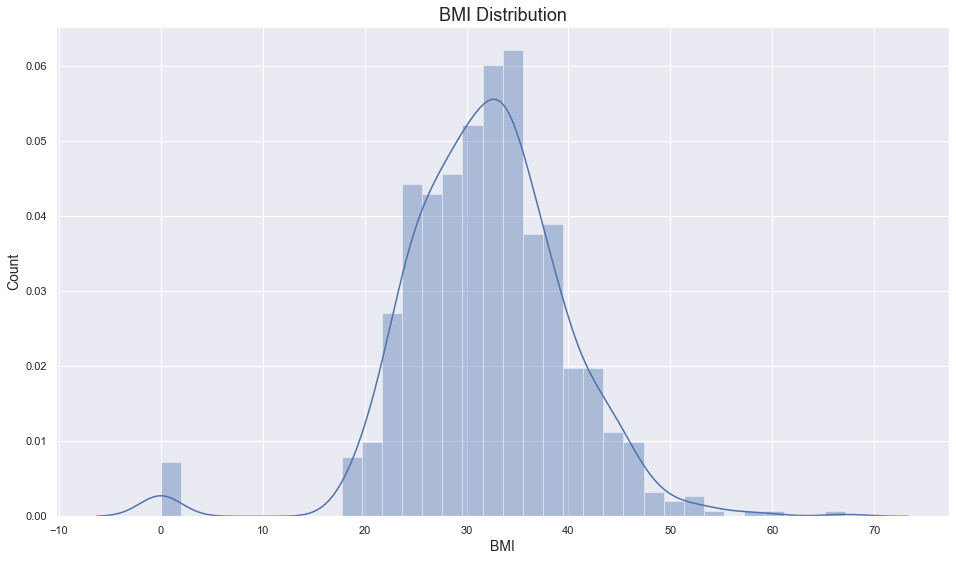

In [17]:
plt.title('BMI Distribution', fontsize=18)
plt.xlabel('BMI', fontsize=14)
plt.ylabel('Count', fontsize=14)
sns.distplot(df['BMI'].dropna())

C:\Users\gihan\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Diabetes Pedigree Function Distribution'}, xlabel='DiabetesPedigreeFunction', ylabel='Count'>

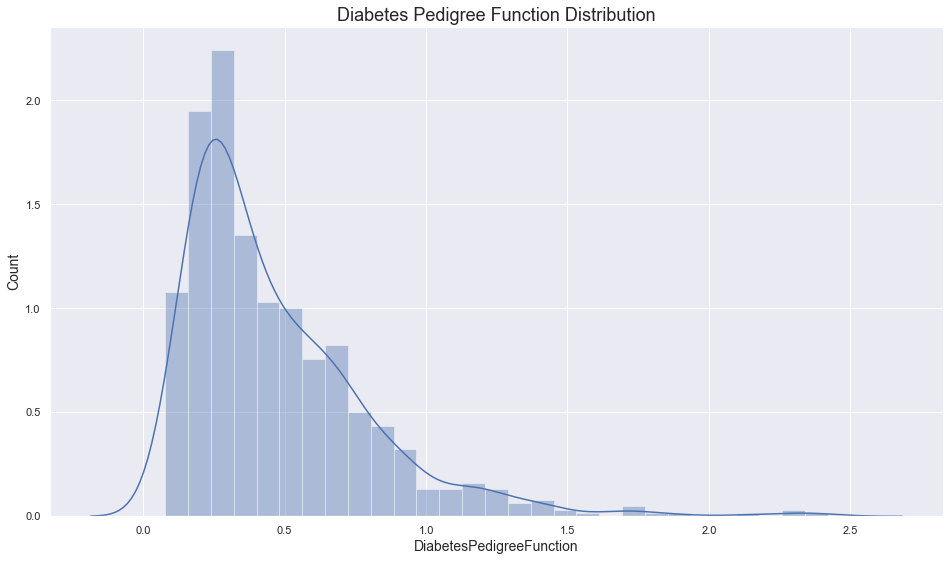

In [18]:
plt.title('Diabetes Pedigree Function Distribution', fontsize=18)
plt.xlabel('Diabetes Pedigree Function', fontsize=14)
plt.ylabel('Count', fontsize=14)
sns.distplot(df['DiabetesPedigreeFunction'].dropna())

C:\Users\gihan\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Age Distribution'}, xlabel='Age', ylabel='Count'>

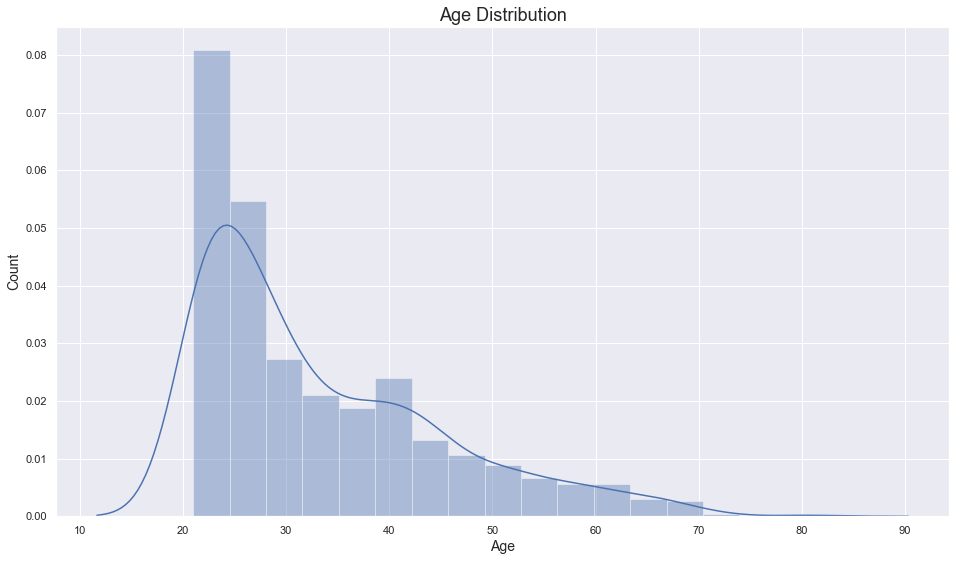

In [19]:
plt.title('Age Distribution', fontsize=18)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)
sns.distplot(df['Age'].dropna())

<AxesSubplot:title={'center':'Outcome Distribution'}, ylabel='Outcome'>

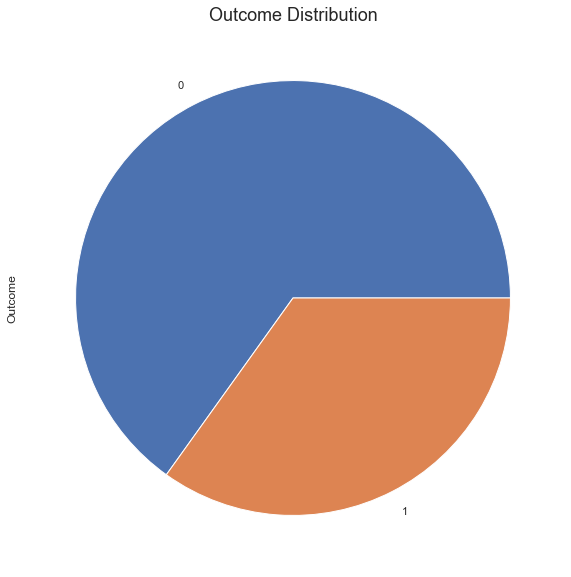

In [31]:
plt.title('Outcome Distribution', fontsize=18)
df['Outcome'].value_counts().plot(kind='pie',figsize=(10, 10))

## Feature engineering

<AxesSubplot:title={'center':'Co - relation matrix'}>

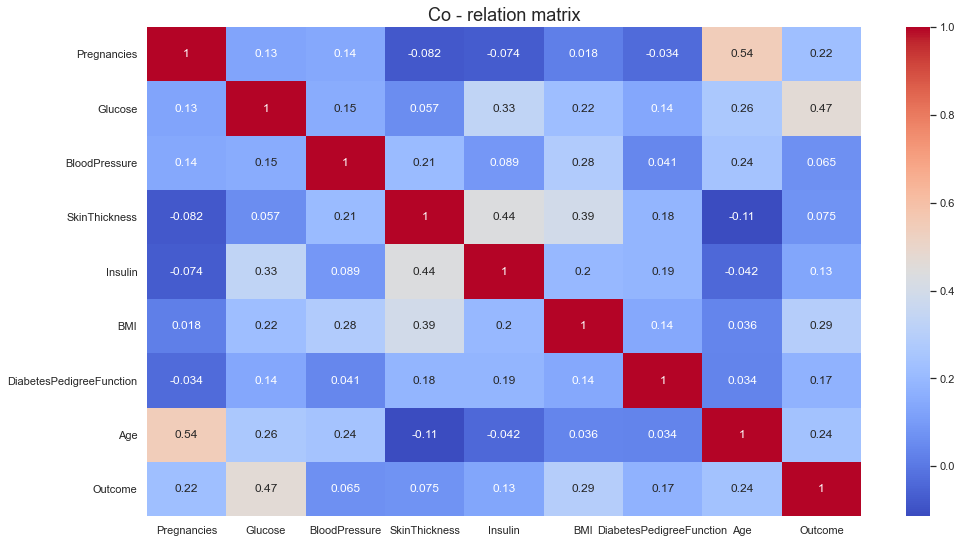

In [29]:
corelation = df.corr()
plt.title('Co - relation matrix', fontsize=18)
sns.heatmap(df.corr(),cmap='coolwarm', annot=True)
#plt.title('df.corr()')

In [36]:
# Select highly correlated features and remove first correlated feature from pair

def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [37]:
# Check corelated feature count
corr_features = correlation(df, 0.7)
len(set(corr_features))

0

***There is no any co-relation among the features.***

## Missing value handelling

In [38]:
# replace all zeros with NaN
df = df.astype({"Outcome":'category'})
cols =['Glucose','BloodPressure','SkinThickness','Insulin','BMI','Age']
df[cols] = df[cols].replace({'0':np.nan, 0:np.nan})

In [39]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

<AxesSubplot:>

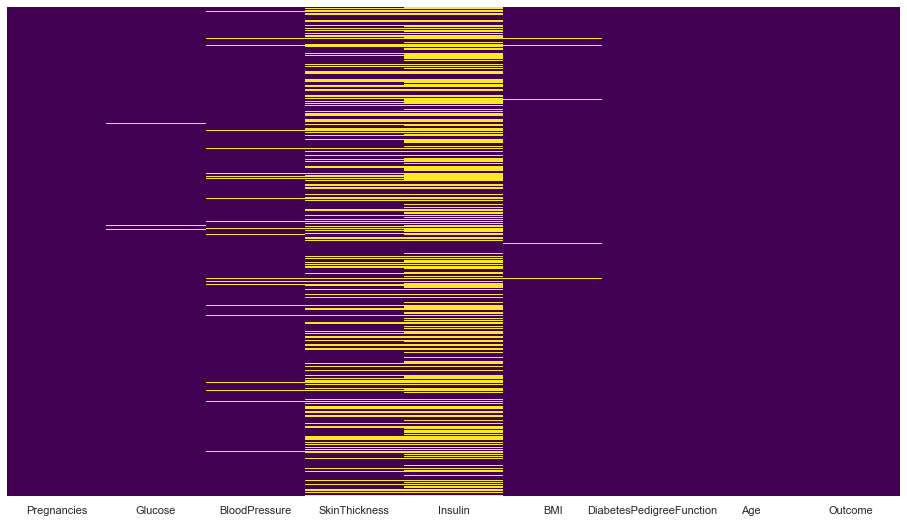

In [40]:
# Heat maps for missing value handelling
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [41]:
# Replace all NaN values with median
df['Glucose'].fillna(int(df['Glucose'].median()), inplace=True)
df['BloodPressure'].fillna(int(df['BloodPressure'].median()), inplace=True)
df['SkinThickness'].fillna(int(df['SkinThickness'].median()), inplace=True)
df['Insulin'].fillna(int(df['Insulin'].median()), inplace=True)
df['BMI'].fillna(int(df['BMI'].median()), inplace=True)

<AxesSubplot:>

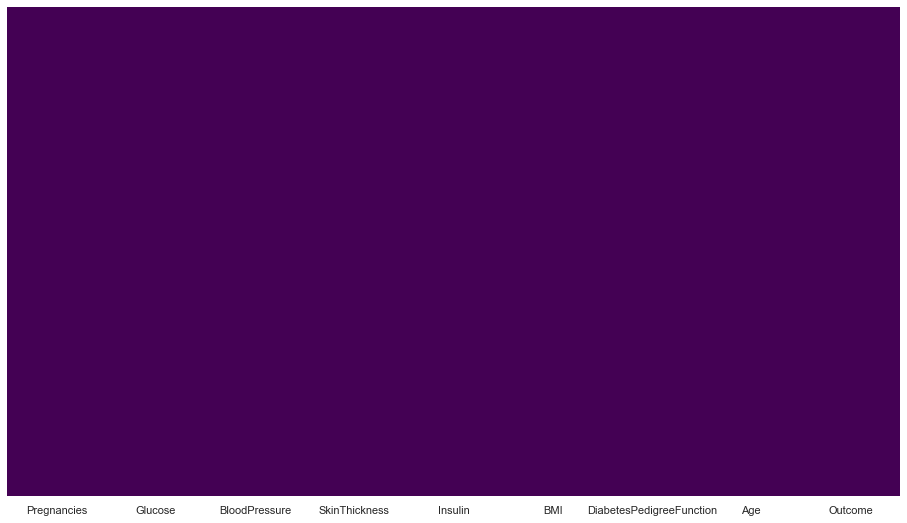

In [43]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [27]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Split data set

In [45]:
X = df.drop(['Outcome'], axis=1)
y = df.Outcome

In [47]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50.0
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31.0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32.0
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21.0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33.0


In [48]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: category
Categories (2, int64): [0, 1]

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [50]:
print("****","Train & Test size","****")
print(X_train.shape)
print(X_test.shape)

**** Train & Test size ****
(537, 8)
(231, 8)


## Logistic Regression algorithm

In [53]:
scale = StandardScaler ()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [54]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [55]:
y_lr = lr.predict(X_test)

### Accuracy score

In [56]:
print(accuracy_score(y_test,y_lr))

0.7705627705627706


In [57]:
print(confusion_matrix(y_test,y_lr))

[[131  19]
 [ 34  47]]


In [59]:
print(classification_report(y_test, y_lr))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.71      0.58      0.64        81

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



### Hyper parameter tuning

In [72]:
#hyper Parameter Optimization
params_lr = {
    
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
    
}

In [63]:
random_search_lr=RandomizedSearchCV(LogisticRegression(),param_distributions=params_lr,n_iter=5,scoring='accuracy',
                                    n_jobs=-1,cv=5,verbose=3)

In [64]:
random_search_lr.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\gihan\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.65178262 0.75989962 0.75989962        nan]
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=5, n_jobs=-1,
                   param_distributions={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   scoring='accuracy', verbose=3)

In [65]:
random_search_lr.best_params_

{'solver': 'lbfgs', 'penalty': 'l2', 'C': 1.0}

In [66]:
lr_new = LogisticRegression(solver= 'liblinear', penalty= 'l2', C= 100.0)
lr_new.fit(X_train,y_train)

LogisticRegression(C=100.0, solver='liblinear')

In [67]:
y_lr_new = lr_new.predict(X_test)

### Accuracy score

In [73]:
print(accuracy_score(y_test,y_lr_new))

0.7705627705627706


In [74]:
print(confusion_matrix(y_test,y_lr_new))

[[131  19]
 [ 34  47]]


In [75]:
print(classification_report(y_test, y_lr_new))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       150
           1       0.71      0.58      0.64        81

    accuracy                           0.77       231
   macro avg       0.75      0.73      0.74       231
weighted avg       0.77      0.77      0.76       231



## Random Forest algorithm

In [77]:
rf = ensemble.RandomForestClassifier()
rf.fit(X_train, y_train)
y_rf = rf.predict(X_test)

In [78]:
rf1 = ensemble.RandomForestClassifier(n_estimators=100, min_samples_leaf=10, max_features=5)
rf1.fit(X_train, y_train)
y_rf1 = rf1.predict(X_test)

### Accuracy score

In [158]:
rf1_score = accuracy_score(y_test, y_rf1)
print(rf1_score)

0.7619047619047619


In [89]:
cm = confusion_matrix(y_test, y_rf1)
print(cm)

[[125  25]
 [ 25  56]]


In [160]:
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       150
           1       0.68      0.68      0.68        81

    accuracy                           0.77       231
   macro avg       0.75      0.75      0.75       231
weighted avg       0.77      0.77      0.77       231



### Hyper parameter tuning

In [80]:
#hyper Parameter Optimization
params={'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10,20,30,40,50,60,70,80,200, 400, 600]}

In [81]:
random_search=RandomizedSearchCV(rf,param_distributions=params,n_iter=5,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)

In [82]:
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 200, 400,
                                                         600]},
                   scoring='accuracy', verbose=3)

In [83]:
random_search.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30,
 'bootstrap': True}

In [84]:
rfc = RandomForestClassifier(n_estimators= 200,
 min_samples_split= 2,
 min_samples_leaf= 4,
 max_features= 'auto',
 max_depth= 30,
 bootstrap= True)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       150
           1       0.69      0.64      0.67        81

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



In [85]:
rf1_score_new = accuracy_score(y_test, rfc_pred)

### Accuracy score

In [93]:
print(rf1_score_new)

0.7748917748917749


In [94]:
print(confusion_matrix(y_test, rfc_pred))

[[127  23]
 [ 29  52]]


In [95]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       150
           1       0.69      0.64      0.67        81

    accuracy                           0.77       231
   macro avg       0.75      0.74      0.75       231
weighted avg       0.77      0.77      0.77       231



## Conclussion

**Random Forest and Logistic Regression Classofiers has almost same performace in terms of accuracy, recall, precision scores**